# WAVE

**Workshop for Analytical Visualization and Exploration**

This notebook is meant to show what I mean by 'Visual Thinking'. Everything you need is provided below. No coding necessary. Just uncomment the code and run the cell by pressing **SHIFT + ENTER** on your keyboard.

Here are some examples I will refer to as we talk about the principles of visual thinking:
+ Parable of the Polygons: http://ncase.me/polygons/
+ Betterment: https://www.betterment.com/portfolio/
+ Feynman Diagram: https://en.wikipedia.org/wiki/Feynman_diagram
+ Challenger PowerPoint: http://businessofstory.com/wp-content/uploads/2013/01/Columbiappt.jpg
+ Using Words: http://writingcenter.unc.edu/handouts/sciences/
+ Volume 3 Lab: http://www.acme.byu.edu/wp-content/uploads/2016/09/Vol3A-Pandas3-2016.pdf

Extra stuff:
+ Gapminder: https://www.ted.com/talks/hans_rosling_shows_the_best_stats_you_ve_ever_seen?language=en
+ 3blue1brown: https://www.youtube.com/watch?v=PFDu9oVAE-g
+ A Visual Intro to Machine Learning: http://www.r2d3.us/visual-intro-to-machine-learning-part-1/
+ Rent or Buy?: http://www.nytimes.com/interactive/2014/upshot/buy-rent-calculator.html?_r=0
+ Gun Deaths in America: http://fivethirtyeight.com/features/gun-deaths/
+ Visualizing the internet: http://internet-map.net/
+ How we see color: https://www.pantone.com/how-do-we-see-color
+ xkcd Earth Temperature: http://xkcd.com/1732/

In [1]:
import numpy as np
import pydataset
from scipy.stats import linregress
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
A1 = pydataset.data('Arbuthnot')
A2 = pydataset.data('anscombe')

**This data set is known as Anscombe's quartet.**

In [3]:
A2.head()

,x1,x2,x3,x4,y1,y2,y3,y4
1,10,10,10,8,8.04,9.14,7.46,6.58
2,8,8,8,8,6.95,8.14,6.77,5.76
3,13,13,13,8,7.58,8.74,12.74,7.71
4,9,9,9,8,8.81,8.77,7.11,8.84
5,11,11,11,8,8.33,9.26,7.81,8.47


Replace 'x1' and 'y1' in the cell below with two different corresponding columns. Uncomment the code to calculate the mean, standard deviation, correlation coefficient, and regression line. In the following cell, uncomment the code to plot each column pair.

In [4]:
print "Mean"
print A2[['x1','y1']].mean()
print "\nStandard Deviation"
print A2[['x1','y1']].std()
print "\nCorrelation Coefficient Matrix"
print np.corrcoef(A2['x1'].as_matrix(),A2['y1'].as_matrix())
print "\nLine of Best Fit"
eq1 = linregress(A2['x1'].as_matrix(),A2['y1'].as_matrix())
print 'y = %f x + %f' % (eq1[0],eq1[1])

Mean
x1    9.000000
y1    7.500909
dtype: float64

Standard Deviation
x1    3.316625
y1    2.031568
dtype: float64

Correlation Coefficient Matrix
[[ 1.          0.81642052]
 [ 0.81642052  1.        ]]

Line of Best Fit
y = 0.500091 x + 3.000091


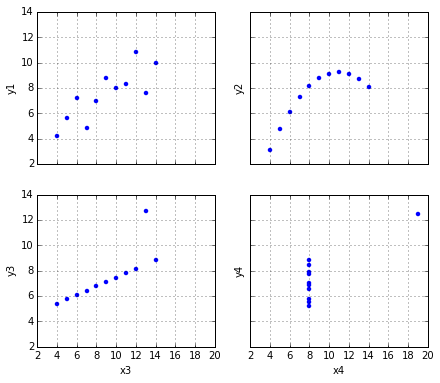

In [5]:
fig,ax = plt.subplots(2,2,sharex=True,sharey=True)
fig.set_figwidth(7)
fig.set_figheight(6)
A2[['x1','y1']].plot(kind='scatter',x='x1',y='y1',linewidth=0,ax=ax[0,0])
A2[['x2','y2']].plot(kind='scatter',x='x2',y='y2',linewidth=0,ax=ax[0,1])
A2[['x3','y3']].plot(kind='scatter',x='x3',y='y3',linewidth=0,ax=ax[1,0])
A2[['x4','y4']].plot(kind='scatter',x='x4',y='y4',linewidth=0,ax=ax[1,1])

# Designing a Visualization

*Design is thinking made visual.* -- Paul Bass

What does that quote even mean? How is thinking made visual? The principles of design are tools for communication. Below is an example of how to 'think visually' using data from Arbuthnot's birth rate dataset. For details on the data involved, see pydataset('Arbuthnot', show_doc=True).

Pretend that after exploring the dataset, you decide that a scatter plot represents the data best. You want to know if there are more males born than females. Start with a simple default scatter plot. Each point represents a year with the x axis as the number of males christened and the y axis as the number of females christened.

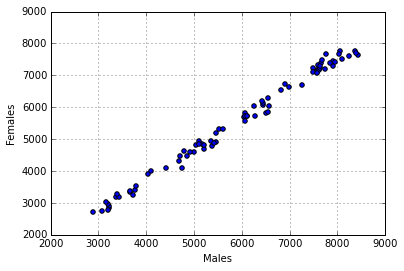

In [6]:
A1.plot(kind='scatter',x='Males',y='Females')

We should expect birth rates to be about the same for each sex. The graph above looks pretty close, but the graph is a rectangular box. It's hard to compare birth rates so let's make the axes equal.

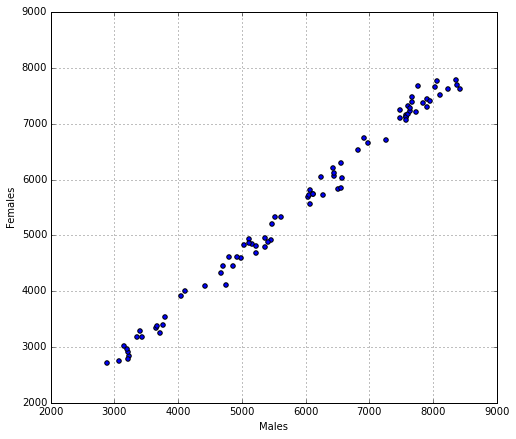

In [7]:
A1.plot(kind='scatter',x='Males',y='Females',figsize=(8,7))

Wow! It's a lot easier to compare along equivalent axes. That makes sense. Now, you can see that fair comparison visually represented. What else can we do? Since we want to know if there are more males born than females, we could draw the line where there would be equal male to female christening. I'll call this the parity line because parity means equal.

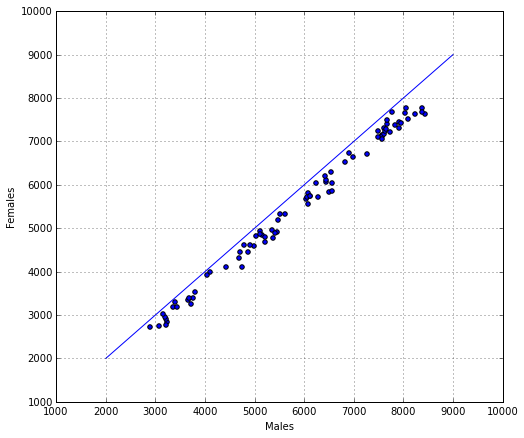

In [8]:
A1['parity'] = np.linspace(2000,9000,82)
ax = A1.plot(kind='scatter',x='Males',y='Females',figsize=(8,7))
ax.plot(A1['parity'],A1['parity'])
plt.show()

Well, now it looks obvious. There are clearly more males christened than females. Arbuthnot ran a statistical significance test to conclude that there were more males christened. We did the same thing, but visually. Now, we need to communicate this insight to others. This means we need to figure out what we want to bring attention to.

I care about the data points first and the line second because the data actually communicates the insight. So I'll make the line grey so that it doesn't grab our attention first. I'll also extend the line to run from corner to corner to make the divide between male and female more explicit.

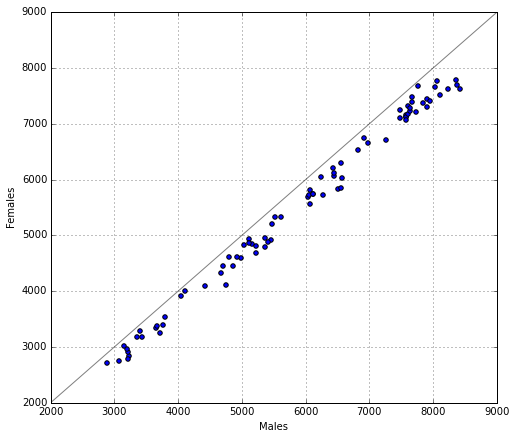

In [9]:
ax = A1.plot(kind='scatter',x='Males',y='Females',figsize=(8,7))
ax.plot(A1['parity'],A1['parity'],color='grey')
ax.set_xlim(2000,9000)
ax.set_ylim(2000,9000)
plt.show()

The dots are a little dark. This is because there are lines drawn around the blue dots. I'm going to get rid of those lines to make the dots stand out more.

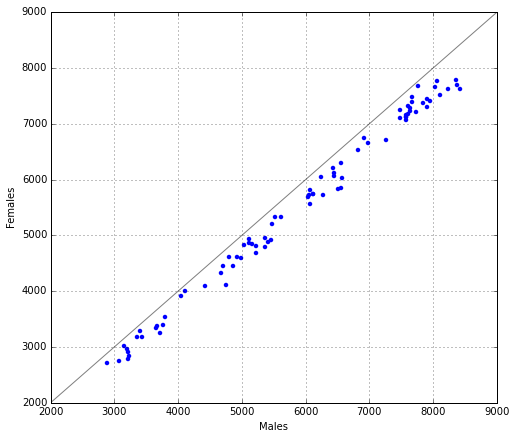

In [10]:
ax = A1.plot(kind='scatter',x='Males',y='Females',linewidth=0,figsize=(8,7))
ax.plot(A1['parity'],A1['parity'],color='grey')
ax.set_xlim(2000,9000)
ax.set_ylim(2000,9000)
plt.show()

The dots are a little bit small and harder to see. I'll try making them bigger.

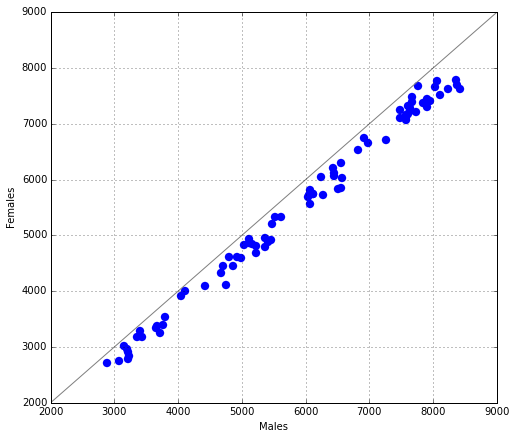

In [11]:
ax = A1.plot(kind='scatter',x='Males',y='Females',s=70,linewidth=0,figsize=(8,7))
ax.plot(A1['parity'],A1['parity'],color='grey')
ax.set_xlim(2000,9000)
ax.set_ylim(2000,9000)
plt.show()

I think that looks better... but it looks messy now. The small dots gave me a lot of precision but the big dots let's me see how many male and female christenings there are for each dot. But if I make the dots transparent...

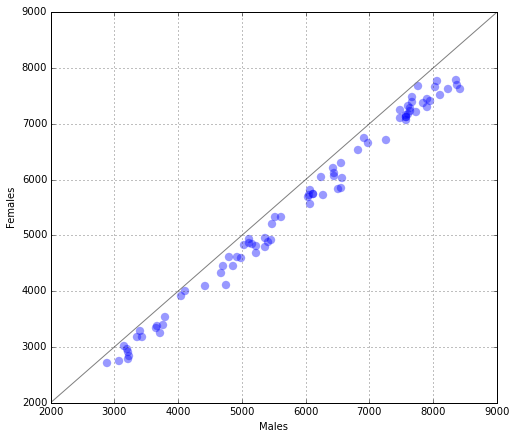

In [12]:
ax = A1.plot(kind='scatter',x='Males',y='Females',s=70,alpha=.4,linewidth=0,figsize=(8,7))
ax.plot(A1['parity'],A1['parity'],color='grey')
ax.set_xlim(2000,9000)
ax.set_ylim(2000,9000)
plt.show()

I don't lose any information. What's more, it's easier to see the density of the dots a little better. As a final touch, I'll change the dot color to red because we have more red color receptors in our eyes, and that helps draw more attention to the dots.

/home/derek/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


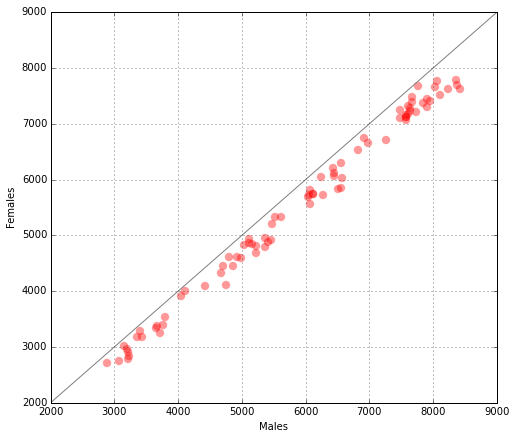

In [13]:
ax = A1.plot(kind='scatter',x='Males',y='Females',color='r',s=70,alpha=.4,linewidth=0,figsize=(8,7))
ax.plot(A1['parity'],A1['parity'],color='grey')
ax.set_xlim(2000,9000)
ax.set_ylim(2000,9000)
ax.legend(loc=0)
plt.show()

Compare this graph with the one we started with. I can consume the information in the top graph almost instantaneously. The bottom graph isn't very sexy nor is it helpful for communicating insight. A statistical significance test is hardly necessary to conclude that there were more male christenings than female christenings when we use the first graph. In this case, I can replace a long explanation about statistical significance with a visualization. I am using my reasoning skills visually instead of mathematically. Both perspectives are valid approaches to analyzing data.

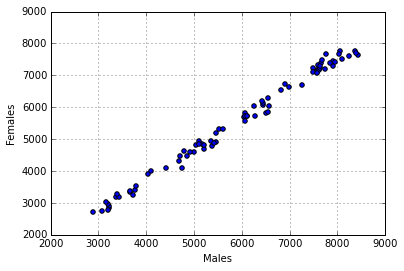

In [14]:
A1.plot(kind='scatter',x='Males',y='Females')